# Q6

### Applied Technique \#1
Applied Dropout on FC layers with p=0.3

In [1]:
import torch.nn as nn

class CustomLeNet5(nn.Module):
    def __init__(self):
        super(CustomLeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5) # 합성곱
        self.act1 = nn.ReLU()  # 활성화 함수
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) # Subsampling
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5) # 합성곱
        self.act2 = nn.ReLU()  # 활성화 함수
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2) # Subsampling
       
        self.fc1 = nn.Linear(16 * 4 * 4, 120) # Full pool2의 Output = 4*4
        self.act3 = nn.ReLU()  # 활성화 함수
        self.drop1 = nn.Dropout(p=0.3)

        self.fc2 = nn.Linear(120, 84) # Full
        self.act4 = nn.ReLU()  # 활성화 함수
        self.drop2 = nn.Dropout(p=0.3)

        self.fc3 = nn.Linear(84, 10) # Full
         
    def forward(self, img):
        
        output = self.conv1(img)
        output = self.act1(output)
        output = self.pool1(output)
        
        output = self.conv2(output)
        output = self.act2(output)
        output = self.pool2(output)
        
        output = output.view(-1, 16 * 4 * 4) # Full에 전달하기 전에 크기 맞춰주기
        output = self.fc1(output)
        output = self.act3(output)
        output = self.drop1(output)
        
        output = self.fc2(output)
        output = self.act4(output)
        output = self.drop2(output)
        
        output = self.fc3(output)
        
        return output

### Applied Technique \#2
Applied Data Augmentation - RandomRotation using torchvision.transform.RandomRotation.
All the other parameters were set to default and the rotation degrees was set to (-10,10) means that randomly rotated in range of -10 to 10

In [2]:
import os
import torch
import PIL
from torch.utils.data import Dataset
from torchvision import transforms

class CustomMNIST(Dataset):
    def __init__(self, data_dir,train=True):
        self.data_dir = data_dir
        self.data_list = [os.path.join(data_dir, data) for data in os.listdir(data_dir)] # data list
        if train:
            self.transform =  transforms.Compose([transforms.ToTensor(),  # 이미지를 텐서로 변환, 자동으로 0~1로 Normalize
                                                  transforms.RandomRotation(degrees=(-10, 10)), # # Data Augmentation - 랜덤 회전
                                                  transforms.Normalize((0.1307,), (0.3081,))])  # 평균값 빼기 및 표준 편차로 나누기
        else:
            self.transform =  transforms.Compose([transforms.ToTensor(),  # 이미지를 텐서로 변환, 자동으로 0~1로 Normalize
                                              transforms.Normalize((0.1307,), (0.3081,))])  # 평균값 빼기 및 표준 편차로 나누기
    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        target = self.data_list[idx]
        label = int(target.split('_')[1].split('.')[0])
        
        image = PIL.Image.open(target).convert('L') 
        image = self.transform(image)
        
        return image, label

# Comparative Result

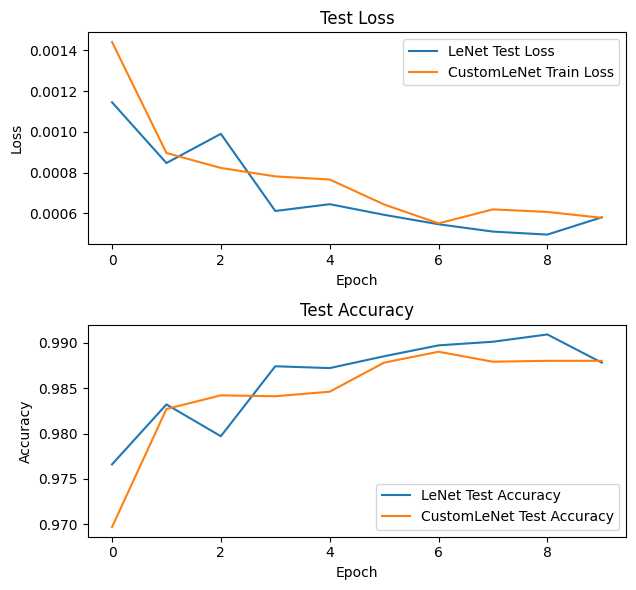

In [1]:
import numpy as np
import matplotlib.pyplot as plt

LeNet_test_loss_path = "../result/LeNet/test_loss.npy"
LeNet_test_accuracy_path = "../result/LeNet/test_accuracy.npy"

LeNet_test_loss = np.load(LeNet_test_loss_path)
LeNet_test_accuracy = np.load(LeNet_test_accuracy_path)

LeNet2_test_loss_path = "../result/CustomLeNet/test_loss.npy"
LeNet2_test_accuracy_path = "../result/CustomLeNet/test_accuracy.npy"

LeNet2_test_loss = np.load(LeNet2_test_loss_path)
LeNet2_test_accuracy = np.load(LeNet2_test_accuracy_path)

epochs = len(LeNet_test_loss)

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 2)
plt.plot(range(epochs), LeNet_test_loss, label="LeNet Test Loss")
plt.plot(range(epochs), LeNet2_test_loss, label="CustomLeNet Train Loss")
plt.title("Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(range(epochs), LeNet_test_accuracy, label="LeNet Test Accuracy")
plt.plot(range(epochs), LeNet2_test_accuracy, label="CustomLeNet Test Accuracy")
plt.title("Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

They showed similar performance, that means my implementation didn't work well.